# 实验内容

这次实验给定如下资料，所有文件放在data文件夹中。

```
data
├─classification_dataset
│      15351234_Sample_KNN_classification.csv
│      15351234_Sample_NB_classification.csv
│      test_set.csv
│      train_set.csv
│      validation_set.csv
│
└─regression_dataset
        15351234_Sample_KNN_regression.csv
        15351234_Sample_NB_regression.csv
        test_set.csv
        train_set.csv
        validation_set.csv
        validation相关度评估.xlsx
```

要求实验KNN和NB两种算法对以上给出的数据集进行处理。

# 分类

## 数据预处理及分析


### 数据读取函数实现

In [6]:
import pandas as pd

def loadDataSet(filePath):
    '''读取数据集函数'''
    #读取CSV文件
    df = pd.read_csv(filePath)
    #得到数据集标签
    label = list(df['label'].values)  
    #得到数据集
    dataSet = [i.strip().split(' ') for i in list(df['Words (split by space)'].values)]
    #得到数据集的所有不重复的词
    allWords = list(set([j for i in dataSet for j in i]))
    
    ############输出数据集相关信息###########################
    #输出第一行数据
    print('【one line\'s data preview】:')
    display(df.head(1))
    #输出所有label的分布
    print('【count of all kind of labels】:\n')
    print(df['label'].value_counts())
    #输出所有的词的个数
    print('【number of all words】: ', len(allWords))
    print('【number of texts】: ', len(df))
    ############输出数据集相关信息###########################
    
    return dataSet, label, allWords

### 读取训练集、验证集、测试集

In [7]:
dataPath = '.\\data\\classification_dataset\\'
trainSet, trainSet_label, allWords_trainSet = loadDataSet(dataPath+'train_set.csv')

【one line's data preview】:


,Words (split by space),label
0,europe retain trophy with big win,joy


【count of all kind of labels】:

joy         222
sad         132
surprise    113
fear         95
anger        41
disgust      20
Name: label, dtype: int64
【number of all words】:  2087
【number of texts】:  623


In [162]:
validatePath = dataPath+'validation_set.csv'
validateSet, validateSet_label, allWords_validateSet = loadDataSet(validatePath)

【one line's data preview】:


,Words (split by space),label
0,marijuana helps ease hiv nerve pain study says,surprise


【count of all kind of labels】:

joy         112
sad          65
fear         54
surprise     46
anger        21
disgust      13
Name: label, dtype: int64
【number of all words】:  1235
【number of texts】:  311


In [9]:
testSet, _ , allWords_testSet = loadDataSet(dataPath+'test_set.csv')

【one line's data preview】:


,textid,Words (split by space),label
0,1,senator carl krueger thinks ipods can kill you,?


【count of all kind of labels】:

?    312
Name: label, dtype: int64
【number of all words】:  1273
【number of texts】:  312


合并三个数据集的所有不重复的词，供后续得到onehot和TF矩阵使用。

In [10]:
allWords_train_validate = list(set(allWords_trainSet).union(allWords_validateSet))
allWords_train_test = list(set(allWords_trainSet).union(allWords_testSet))
len(allWords_train_validate), len(allWords_train_test)

(2722, 2771)

## knn分类算法

### 得到3个数据集的onehot矩阵

这个是上次实验的内容，这里就不再赘述实现思路。

In [77]:
def getOneHot(dataSet, allWords):
    '''得到输入数据集的one-hot矩阵'''
    oneHot=[]
    for index, doc in enumerate(dataSet):
        oneHot.append([])
        for word in allWords:
            if word in doc:
                oneHot[index].append(1)
            else: 
                oneHot[index].append(0)
    return oneHot

#得到训练集、验证集、测试集的onehot矩阵
oneHot_trainSet = getOneHot(trainSet, allWords_train_validate)
oneHot_validateSet = getOneHot(validateSet, allWords_train_validate)

oneHot_trainSet_ = getOneHot(trainSet, allWords_train_test)
oneHot_testSet = getOneHot(testSet, allWords_train_test)

### 得到3个数据集的TF矩阵

这个同样是上次实验的内容，这里就不再赘述实现思路。

In [78]:
from collections import Counter

def getTF(dataSet, allWords):
    '''得到输入数据集的TF矩阵'''
    TF=[]
    for index, doc in enumerate(dataSet):
        TF.append([])
        wordCounter = Counter(doc)
        for word in allWords:
            TF[index].append(wordCounter.get(word,0)/len(doc))
    return TF

#得到训练集、验证集、测试集的TF矩阵
TF_trainSet = getTF(trainSet, allWords_train_validate)
TF_validateSet = getTF(validateSet, allWords_train_validate)

TF_trainSet_ = getTF(trainSet, allWords_train_test)
TF_testSet = getTF(testSet, allWords_train_test)

### 分类函数实现及简单测试

伪代码：

```
knn_classify(dataSet, labels, k, inputVector):

输入数据：
------------
dataSet - 训练集
labels - 训练集标签
k - 要指定的k值
inputVector - 输入要分类的向量
------------

输出数据：
------------
对输入向量的分类类别
------------

实现思路（默认使用欧氏距离）：
------------
1.到输入向量与数据集的差值的平方
2.计算每一行上元素的和并开方，得到距离向量
3.得到K个近邻的下标
4.返回分类结果
------------
```

In [353]:
import numpy as np
from collections import Counter

def knn_classify(dataSet, labels, k, inputVector):
    '''使用knn对输入的向量进行分类，使用欧式距离'''
    #得到输入向量与数据集的差值的平方
    diffMat = (np.array(dataSet) - np.array(inputVector))**2
    #计算每一行上元素的和并开方，得到距离向量
    distances = np.sqrt(diffMat.sum(axis=1))
    #print("输入向量与训练集每个向量的距离依次为：",list(distances))
    #得到 K个近邻的下标
    kNeighborsIndex  = distances.argpartition(k-1)[0:k]
    #返回分类结果
    return Counter(np.array(labels)[kNeighborsIndex]).most_common(1)[0][0]

##############测试程序#######################
knn_classify([[1,1,0,0],
              [0,1,1,1],
              [1,0,0,1]],['positive','negative','positive'], 1, [0,1,1,0])
##############测试程序#######################

输入向量与训练集每个向量的距离依次为： [1.4142135623730951, 1.0, 2.0]


'negative'

这里计算了输入向量与训练集3个向量的距离，k取值为1，因此选择与其相近（距离为1）的一个向量的标签，因此输入向量的分类标签为negative。符合预期，该函数实现正常。

### 使用验证集调参
#### 使用onehot矩阵

In [35]:
def run_knn_classify1(k):
    '''使用验证集得到分类准确率，进行调参'''
    hitNum = 0
    for index, wordVector in enumerate(oneHot_validateSet):
        ans = knn_classify(oneHot_trainSet, trainSet_label, k, wordVector)
        if  ans == validateSet_label[index]:
            hitNum +=1
    print("k = %2d : accuracy: %.5f%%" % (k, 100*hitNum/len(validateSet)))
    
for k in range(1,50):
    run_knn_classify1(k)

k =  1 : accuracy: 37.29904%
k =  2 : accuracy: 26.04502%
k =  3 : accuracy: 37.62058%
k =  4 : accuracy: 32.47588%
k =  5 : accuracy: 32.15434%
k =  6 : accuracy: 32.47588%
k =  7 : accuracy: 36.33441%
k =  8 : accuracy: 36.01286%
k =  9 : accuracy: 37.29904%
k = 10 : accuracy: 39.87138%
k = 11 : accuracy: 39.54984%
k = 12 : accuracy: 39.22830%
k = 13 : accuracy: 40.83601%
k = 14 : accuracy: 42.44373%
k = 15 : accuracy: 39.54984%
k = 16 : accuracy: 41.15756%
k = 17 : accuracy: 40.51447%
k = 18 : accuracy: 38.58521%
k = 19 : accuracy: 38.26367%
k = 20 : accuracy: 38.90675%
k = 21 : accuracy: 38.58521%
k = 22 : accuracy: 38.26367%
k = 23 : accuracy: 37.94212%
k = 24 : accuracy: 37.94212%
k = 25 : accuracy: 37.94212%
k = 26 : accuracy: 37.62058%
k = 27 : accuracy: 36.97749%
k = 28 : accuracy: 37.29904%
k = 29 : accuracy: 37.94212%
k = 30 : accuracy: 37.29904%
k = 31 : accuracy: 36.65595%
k = 32 : accuracy: 37.29904%
k = 33 : accuracy: 37.94212%
k = 34 : accuracy: 38.58521%
k = 35 : accur

#### 使用TF矩阵

In [36]:
def run_knn_classify2(k):
    '''使用验证集得到分类准确率，进行调参'''
    hitNum = 0
    for index, wordVector in enumerate(TF_validateSet):
        ans = knn_classify(TF_trainSet, trainSet_label, k, wordVector)
        if  ans == validateSet_label[index]:
            hitNum +=1
    print("k = %2d : accuracy: %.5f%%" % (k, 100*hitNum/len(validateSet)))
    
for k in range(1,50):
    run_knn_classify2(k)

k =  1 : accuracy: 32.47588%
k =  2 : accuracy: 25.72347%
k =  3 : accuracy: 24.75884%
k =  4 : accuracy: 25.08039%
k =  5 : accuracy: 23.47267%
k =  6 : accuracy: 25.40193%
k =  7 : accuracy: 26.36656%
k =  8 : accuracy: 27.97428%
k =  9 : accuracy: 27.97428%
k = 10 : accuracy: 25.72347%
k = 11 : accuracy: 26.36656%
k = 12 : accuracy: 26.68810%
k = 13 : accuracy: 29.26045%
k = 14 : accuracy: 29.58199%
k = 15 : accuracy: 30.54662%
k = 16 : accuracy: 30.86817%
k = 17 : accuracy: 28.29582%
k = 18 : accuracy: 28.29582%
k = 19 : accuracy: 26.36656%
k = 20 : accuracy: 27.97428%
k = 21 : accuracy: 27.33119%
k = 22 : accuracy: 28.29582%
k = 23 : accuracy: 28.29582%
k = 24 : accuracy: 27.97428%
k = 25 : accuracy: 27.97428%
k = 26 : accuracy: 28.61736%
k = 27 : accuracy: 29.26045%
k = 28 : accuracy: 27.65273%
k = 29 : accuracy: 28.29582%
k = 30 : accuracy: 28.29582%
k = 31 : accuracy: 27.65273%
k = 32 : accuracy: 27.00965%
k = 33 : accuracy: 27.00965%
k = 34 : accuracy: 27.00965%
k = 35 : accur

### 对测试集进行分类
#### 使用onehot矩阵

In [358]:
outputFileName = "15352220_linzecheng_KNN_classification_onehot.csv"
bestK = 14
textid_and_label = []
for index, wordVector in enumerate(oneHot_testSet):
        ans = knn_classify(oneHot_trainSet_, trainSet_label, bestK, wordVector)
        textid_and_label.append((index+1, ans))
        
res = pd.DataFrame(textid_and_label, columns=['textid','label'])
res.to_csv(outputFileName, index=False)

In [359]:
res['label'].value_counts() #查看一下结果的分布

joy         233
fear         50
sad          27
surprise      2
Name: label, dtype: int64

#### 使用TF矩阵

In [46]:
outputFileName = "15352220_linzecheng_KNN_classification_TF.csv"
bestK = 16
textid_and_label = []
for index, wordVector in enumerate(TF_testSet):
        ans = knn_classify(TF_trainSet_, trainSet_label, bestK, wordVector)
        textid_and_label.append((index+1, ans))
        
res2 = pd.DataFrame(textid_and_label, columns=['textid','label'])
res2.to_csv(outputFileName, index=False)

In [47]:
res2['label'].value_counts() #查看一下结果的分布

surprise    186
joy          49
sad          32
fear         23
anger        22
Name: label, dtype: int64

## NB分类算法

### 实验原理

NB分类的核心就是使用贝叶斯公式。即是给定一个data，其最优的分类标签：

$bestClass=argmax_{class} P(class|data)=argmax_{class}P(data|class)*P(class)$

其中，$P(class)$可根据给出的训练集中分类为class的样本个数处于总样本个数得到。

而$P(data|class)$则是重点，以本次实验使用的文本为例，一个data可能包含许多个词，比如：

$data =(word_1, word_2, word_3,...,word_n)$

那么我们即是要求：$P(data|class)=P(word_1, word_2, word_3,...,word_n|class)$

那么问题就来了，如果硬是要求这个联合概率，一是要找到能算出这样的概率的样本数很少或几乎没有，二是可能引入大量的0，分类效果就很不好了。

于是，NB就假设data中所有属性之间相互独立，这样一来就有：

$P(data|class)=\prod_{i=1}^{n}P(word_i|class)$

那么如何计算$P(word_i|class)$呢？

这里就要引入多项式模型求解啦，该模型计算公式是这样的：

```
P(word_i|class) = 分类为class的所有文档中word_i出现的次数/分类为class的所有文档的次数和

[注意这里次数和是包括重复的单词的，下同]
```

但是到了这一步还是不够，因此可能我们的训练集给的不够理想，分类为class的所有文档中都没有词$word_i$的出现，那么上面的这个概率就为0了，然而这是很不实际的一种做法，实际为class的文档本来应该可以包含$word_i$的，但是只是训练集没有包含这样的样本而已。

而如果硬是要用这条公式进行计算的话，那么可能会有大量的0出现。

这时就需要进行平滑操作来解决这个bug了。引入平滑操作的新公式为：

```
P(word_i|class) = (分类为class的所有文档中word_i出现的次数+lambda)/
                  (分类为class的所有文档的次数和+lambda*所有文档中不重复词的词数)
```


而当lambda为1时就称为拉普拉斯平滑。

### 得到3个数据集的频次矩阵

根据NB分类引入平滑操作的公式，若以分类的标签为行，以所有不重复的词为列，那么矩阵中的元素就是用这条公式求出来的，而由于公式中有涉及到次数计数，所以这里就暂且将该矩阵命名为频次矩阵。

In [154]:
import numpy as np

def getFreq(trainSet, trainSet_label, allWordsNum_train,
            allWords_train_other, lambda_):
    '''得到输入训练集的频次矩阵、所有可能的标签、对应的标签的概率'''
    def calcProbs(numerator, denominator):
        '''根据输入的分子和分母计算先验概率值'''
        return (numerator+lambda_) / (denominator+lambda_*allWordsNum_train)
    #先将数据类型转为numpy.array
    trainSet = np.array(trainSet)
    trainSet_label = np.array(trainSet_label)
    
    #得到所有可能的标签
    allLabels = list(set(trainSet_label))
    freqMat = dict() #要返回的频次矩阵
    labelPros = dict() #要返回的标签的概率
    #遍历所有标签
    for label in allLabels:
        #找到所有标签为 label 的 documents
        allDocs_with_label = trainSet[np.argwhere(trainSet_label==label)[:,0]]
        #计算每个 label 出现的概率
        labelPros[label] = len(allDocs_with_label)/len(trainSet)
        #得到上面的所有 documents 中的所有词
        allWords_with_label = [j for i in list(allDocs_with_label) for j in i]
        #词频统计
        wordCounter = Counter(allWords_with_label)
        #预分配内存
        freqMat[label] = [0]*len(allWords_train_other)
        #求先验概率时的分母
        denominator_ = len(allWords_with_label)
        #遍历所有词，计算在标签为label的前提下词出现的概率
        for index, word in enumerate(allWords_train_other):
            freqMat[label][index] = calcProbs(wordCounter.get(word,0), denominator_)
            
    return freqMat, allLabels, labelPros

####################测试程序#################
a = [['a','b'], ['b','c']]              #trainSet
b = len(set([j for i in a for j in i])) #allWordsNum_train
c = [['e','a'], ['c','f']]              #otherSet
                                        #allWords_train_other
d = list(set([j for i in a for j in i]).union([j for i in c for j in i]))
e = ['good', 'bad']                     #trainSet_label
a, b, c
d, e
getFreq(a, e, b, d, lambda_=1)          #使用拉普拉斯平滑
####################测试程序#################

([['a', 'b'], ['b', 'c']], 3, [['e', 'a'], ['c', 'f']])

(['e', 'b', 'f', 'c', 'a'], ['good', 'bad'])

({'bad': [0.2, 0.4, 0.2, 0.4, 0.2], 'good': [0.2, 0.4, 0.2, 0.2, 0.4]},
 ['good', 'bad'],
 {'bad': 0.5, 'good': 0.5})

这里给出了一个例子测试该函数的正确性：

给定的训练集`a=[['a', 'b'], ['b', 'c']]`, 对应的lable为`e=['good', 'bad']`, b为a中的所有不重复词的长度3。

给定测试集（或验证集）`c=[['e','a'], ['c','f']]`, 可得两个数据集中所有不重复的词的向量为：

`d=['e', 'b', 'f', 'c', 'a']`

因此，选择拉普拉斯平滑的多项式模型计算，对应的频次矩阵为：

```
{'bad': [(0+1)/(2+3), (1+1)/(2+3), (0+1)/(2+3), (1+1)/(2+3), (0+1)/(2+3)],

'good': [ [(0+1)/(2+3), (1+1)/(2+3), (0+1)/(2+3), (0+1)/(2+3), (1+1)/(2+3)]}
```

即为：
```
         'e'  'b'  'f'  'c'  'a'
{'bad': [0.2, 0.4, 0.2, 0.4, 0.2],
'good': [0.2, 0.4, 0.2, 0.2, 0.4]}
```

而根据训练集得到的每个label的概率P(label)为:`P(good)=1/2=0.5=P(bad)`

可见，输出结果正确，该函数功能正常。

对于需要预测分类的数据集：`c=[['e','a'], ['c','f']]`, 有：

```
P('good'|['e','a']) = P('e'|'good') * P('a'|'good') * P('good')
                    = 0.2 * 0.4 * 0.5 = 0.04
                    
P('bad'|['e','a']) = P('e'|'bad') * P('a'|'bad') * P('bad')
                    = 0.2 * 0.2 * 0.5 = 0.02

P('good'|['c','f']) = P('c'|'good') * P('f'|'good') * P('good')
                    = 0.2 * 0.2 * 0.5 = 0.02
                    
P('bad'|['c','f'] = P('c'|'bad') * P('f'|'bad') * P('bad')
                    = 0.4 * 0.2 * 0.5 = 0.04 
```

因此，`['e','a']`的分类为`'good'`；而`['c','f']`的分类为`'bad'`。

### 分类函数实现及简单测试

伪代码：

```
NB_classify(trainSet, trainSet_label, allWordsNum_train, allWords_train_other,
                otherSet, lambda_):

输入数据：
------------
trainSet - 训练集
trainSet_label - 训练集标签
allWordsNum_train - 训练集中所有不重复词的个数
allWords_train_other - 训练集和验证集（或测试集）中的所有不重复词的列表
otherSet - 验证集（或测试集）
lambda_ - lambda
------------

输出数据：
------------
输入数据集的分类类别
------------

实现思路：
------------
1.得到频次矩阵、所有可能的标签、标签概率
2.对于输入数据集的每一行数据：
2.1.得到当前的一行数据中词在所有词向量的下标
2.1.1.对于所有可能的标签类别
2.1.1.1.得到对应标签的所有词的概率列表，并将所有元素相乘并保存
2.2.得到概率值最大时对应的标签值
3.返回分类结果
------------
```

In [160]:
from functools import reduce

def NB_classify(trainSet, trainSet_label, allWordsNum_train, allWords_train_other,
                otherSet, lambda_):
    #得到频次矩阵、所有可能的标签、标签概率
    freqMat_, allLabels_, labelPros_ = getFreq(trainSet, trainSet_label, 
                    allWordsNum_train,allWords_train_other, lambda_=lambda_)
    ans = [] #存储每行数据对应的最终预测分类
    allWords_ = np.array(allWords_train_other)
    ####print("所有词：", allWords_)
    for data in otherSet:
        #得到当前的一行数据中词在所有词向量allWords_的下标
        matchIndex = np.array([np.argwhere(allWords_ == word)[0][0] 
                                                    for word in data])
        temp = []
        ####print("当前测试文本：", data)
        ####print("在所有词中下标：", matchIndex)
        for label in allLabels_:
            #得到对应label的所有词的概率列表
            probs = np.array(freqMat_[label])
            #得到基于label的概率值
            p = reduce(lambda x,y:x*y, probs[matchIndex]) * labelPros_[label]
            #保存概率结果和对应的label值
            temp.append((p, label))
        #得到概率值最大时对应的label值
        ####print("分为不同类的概率：\n", temp)
        ans.append(max(temp)[1])
    #返回结果
    return ans

NB_classify(a, e, b, d, c, lambda_=1) #使用拉普拉斯平滑

['good', 'bad']

In [157]:
####################测试程序#################
NB_classify(a, e, b, d, c, lambda_=1) #使用拉普拉斯平滑
####################测试程序#################

所有词： ['e' 'b' 'f' 'c' 'a']
当前测试文本： ['e', 'a']
在所有词中下标： [0 4]
分为不同类的概率：
 [(0.040000000000000008, 'good'), (0.020000000000000004, 'bad')]
当前测试文本： ['c', 'f']
在所有词中下标： [3 2]
分为不同类的概率：
 [(0.020000000000000004, 'good'), (0.040000000000000008, 'bad')]


['good', 'bad']

这里输出表明`['e','a']`的分类为`'good'`；而`['c','f']`的分类为`'bad'`，与预期想符合。

### 使用验证集调参

这里需要调参的地方就是：平滑系数 $\lambda$ 的选择了。

In [212]:
def run_NB_classify(lambda_):
    '''使用验证集得到分类准确率，进行调参''' 
    #调用 NB 分类函数
    predictLabel = NB_classify(trainSet, trainSet_label, len(allWords_trainSet),
                               allWords_train_validate, validateSet, lambda_)
    predictLabel = np.array(predictLabel)
    validateSet_label_ = np.array(validateSet_label)
    hitRate = len(predictLabel[predictLabel==validateSet_label_])/len(validateSet)
    #print("lambda = %.5f : accuracy: %.5f%%" % (lambda_, 100*hitRate))
    return hitRate
    
#保存最高的准确率和对应的lambda
maxHitRate, bestLambda = 0, 0
testRange =  np.arange(0,3.1,0.05) #测试lambda的范围
hitRates = np.zeros((1, len(testRange))).flatten()

for index, lambda_ in enumerate(testRange):
    hitRate = run_NB_classify(lambda_) * 100
    hitRates[index] = hitRate
    if hitRate > maxHitRate:
        maxHitRate = hitRate
        bestLambda = lambda_

print('max accuracy is %.5f%% when lambda is %.5f' % (maxHitRate, bestLambda))

max accuracy is 45.65916% when lambda is 1.20000


可见，在 $\lambda$ 为1.2时，分类率最高，为45.65916%。 下面来绘制随着 $\lambda$ 改变，NB分类准确率的变化图：

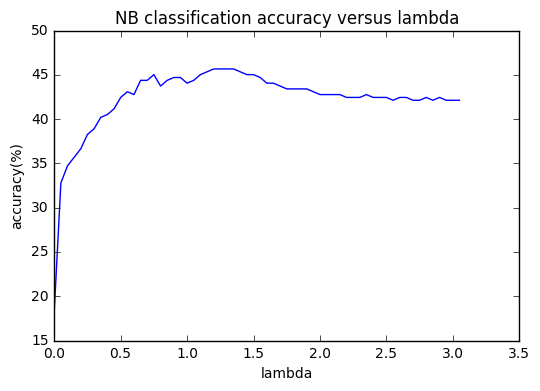

In [270]:
import matplotlib.pyplot as plt

_ = plt.plot(testRange, hitRates)
_ = plt.xlabel('lambda')
_ = plt.ylabel('accuracy(%)')
_ = plt.title("NB classification accuracy versus lambda")
plt.show()
plt.close()

### 对测试集进行分类

下面使用最优的lambda来对测试集进行分类。

In [218]:
outputFileName = "15352220_linzecheng_NB_classification.csv"

#调用 NB 分类函数
predictLabel = NB_classify(trainSet, trainSet_label, len(allWords_trainSet),
                           allWords_train_test, testSet, bestLambda)
        
textid_and_label = [(i, j) for i in np.arange(1,len(testSet)+1) for j in predictLabel]
res = pd.DataFrame(textid_and_label, columns=['textid','label'])
res.to_csv(outputFileName, index=False)

# 回归

## 数据预处理及分析

### 数据读取函数实现

In [223]:
import pandas as pd

def loadDataSet2(filePath):
    '''读取数据集函数'''
    #读取CSV文件
    df = pd.read_csv(filePath)
    #得到数据集标签
    label = dict()
    label['anger'] = list(df['anger'].values)  
    label['disgust'] = list(df['disgust'].values)  
    label['fear'] = list(df['fear'].values)
    label['joy'] = list(df['joy'].values)  
    label['sad'] = list(df['sad'].values)  
    label['surprise'] = list(df['surprise'].values)  
    #得到数据集
    dataSet = [i.strip().split(' ') for i in list(df['Words (split by space)'].values)]
    #得到数据集的所有不重复的词
    allWords = list(set([j for i in dataSet for j in i]))
    
    ############输出数据集相关信息###########################
    #输出第一行数据
    print('【one line\'s data preview】:')
    display(df.head(1))
    #输出所有情感值的一些统计数据
    print('【some summary statistics of labels】:')
    print(df[['anger','disgust','fear','joy','sad','surprise']].describe())
    #输出所有的词的个数
    print('【number of all words】: ', len(allWords))
    print('【number of texts】: ', len(df))
    ############输出数据集相关信息###########################
    
    return dataSet, label, allWords

### 读取训练集、验证集、测试集

In [224]:
dataPath2 = '.\\data\\regression_dataset\\'
trainPath = dataPath2+'train_set.csv'
trainSet2, trainSet_label2, allWords_trainSet2 = loadDataSet2(trainPath)

【one line's data preview】:


,Words (split by space),anger,disgust,fear,joy,sad,surprise
0,europe retain trophy with big win,0.0,0.0,0.0,0.8721,0.0,0.1279


【some summary statistics of labels】:
            anger     disgust        fear         joy         sad    surprise
count  623.000000  623.000000  623.000000  623.000000  623.000000  623.000000
mean     0.086573    0.052949    0.157176    0.281344    0.191442    0.230517
std      0.123334    0.090709    0.174959    0.317420    0.206464    0.199993
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.090100
50%      0.022700    0.000000    0.115400    0.130800    0.142900    0.176500
75%      0.144950    0.083300    0.255450    0.566950    0.293450    0.326750
max      0.753400    0.571400    0.895800    1.000000    1.000000    1.000000
【number of all words】:  2087
【number of texts】:  623


In [227]:
validatePath = dataPath2+'validation_set.csv'
validateSet2, validateSet_label2, allWords_validateSet2 = loadDataSet2(validatePath)

【one line's data preview】:


,Words (split by space),anger,disgust,fear,joy,sad,surprise
0,marijuana helps ease hiv nerve pain study says,0.0,0.0,0.0744,0.2727,0.0992,0.5537


【some summary statistics of labels】:
            anger     disgust        fear         joy         sad    surprise
count  311.000000  311.000000  311.000000  311.000000  311.000000  311.000000
mean     0.085478    0.062534    0.151173    0.287755    0.194680    0.218382
std      0.125672    0.110057    0.175016    0.310162    0.208836    0.189515
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.073650
50%      0.012200    0.000000    0.088900    0.177800    0.138900    0.181800
75%      0.150600    0.098400    0.245550    0.553650    0.300900    0.320900
max      0.777800    0.785700    0.815400    1.000000    0.903200    1.000000
【number of all words】:  1235
【number of texts】:  311


In [228]:
testSet2, _ , allWords_testSet2 = loadDataSet2(dataPath2+'test_set.csv')

【one line's data preview】:


,textid,Words (split by space),anger,disgust,fear,joy,sad,surprise
0,1,senator carl krueger thinks ipods can kill you,?,?,?,?,?,?


【some summary statistics of labels】:
       anger disgust fear  joy  sad surprise
count    312     312  312  312  312      312
unique     1       1    1    1    1        1
top        ?       ?    ?    ?    ?        ?
freq     312     312  312  312  312      312
【number of all words】:  1273
【number of texts】:  312


In [337]:
allWords_train_validate2 = list(set(allWords_trainSet2).union(allWords_validateSet2))
allWords_train_test2 = list(set(allWords_trainSet2).union(allWords_testSet2))
len(allWords_train_validate2), len(allWords_train_test2)

(2722, 2771)

## knn回归算法


###  得到3个数据集的onehot矩阵

In [338]:
#得到训练集、验证集、测试集的onehot矩阵
oneHot_trainSet2 = getOneHot(trainSet2, allWords_train_validate2)
oneHot_validateSet2 = getOneHot(validateSet2, allWords_train_validate2)

oneHot_trainSet2_ = getOneHot(trainSet2, allWords_train_test2)
oneHot_testSet2 = getOneHot(testSet2, allWords_train_test2)

### 得到3个数据集的TF矩阵

In [339]:
from collections import Counter

def getTF(dataSet, allWords):
    '''得到输入数据集的TF矩阵'''
    TF=[]
    for index, doc in enumerate(dataSet):
        TF.append([])
        wordCounter = Counter(doc)
        for word in allWords:
            TF[index].append(wordCounter.get(word,0)/len(doc))
    return TF

#得到训练集、验证集、测试集的TF矩阵
TF_trainSet2 = getTF(trainSet2, allWords_train_validate2)
TF_validateSet2 = getTF(validateSet2, allWords_train_validate2)

TF_trainSet2_ = getTF(trainSet2, allWords_train_test2)
TF_testSet2 = getTF(testSet2, allWords_train_test2)

### 权值归一化函数实现

听说权值归一化有助于分类，这里实现一个函数试试。

In [340]:
def weightNormalize(weight, method='min-max'):
    '''权值归一化函数，输入权值类型为numpy.array'''
    if len(weight) == 1:
        return weight
    elif method == 'min-max':
        return (weight-weight.min())/(weight.max()-weight.min())
    elif method == 'z-score':
        return (weight-weight.mean())/weight.std()

################测试程序##########################
weightNormalize(np.array([1,2,3]))
weightNormalize(np.array([1,2,3]),'z-score')
weightNormalize(np.array([5]))
################测试程序##########################

array([ 0. ,  0.5,  1. ])

array([-1.22474487,  0.        ,  1.22474487])

array([5])

### 回归函数实现及简单测试

伪代码：

```
knn_regress(dataSet, labels, k, inputVector)

输入数据：
------------
dataSet - 训练集
labels - 训练集标签
k - 要指定的k值
inputVector - 输入要回归的向量
------------

输出数据：
------------
输入向量属于各种类别的概率
------------

实现思路（默认使用欧氏距离）：
--------------
1.得到输入向量与数据集的差值的平方
2.计算每一行上元素的和并开方，得到距离向量
3.1.若距离中存在0，则直接拷贝距离为0对应元素的label
3.2.否则：
3.2.1.得到 K个近邻的下标
3.2.2.对于所有的类别：
3.2.2.1.得到 K个近邻的标签
3.2.2.2.保存当前概率值，用于后续归一化
4.将所有概率值的和调整为1
--------------
```

In [361]:
import numpy as np
from collections import Counter

def knn_regress(dataSet, labels, k, inputVector):
    '''使用knn对输入的向量进行回归，先默认使用欧式距离'''
    #得到输入向量与数据集的差值的平方
    diffMat = (np.array(dataSet) - np.array(inputVector))**2
    #计算每一行上元素的和并开方，得到距离向量
    distances = np.sqrt(diffMat.sum(axis=1))
    
    #要输出的label
    outputLabel = dict() 
    #label中每个分量的概率值
    probs = np.zeros((1,len(labels.keys())))
    #若距离中存在0，则直接拷贝距离为0对应元素的label
    if 0 in distances:
        zeroIndex = distances.tolist().index(0)
        for index, i in enumerate(labels.keys()):
            outputLabel[i] = labels[i][zeroIndex]
            probs[0,index] = outputLabel[i]
    else:
        #得到 K个近邻的下标
        kNeighborsIndex  = distances.argpartition(k-1)[0:k]
        #用label值除以距离并求和，更新输出的 label
        weight = 1/distances[kNeighborsIndex]
        
        for index, i in enumerate(labels.keys()):
            #得到 K个近邻的标签
            topKLabel = np.array(labels[i])[kNeighborsIndex]
            outputLabel[i] = (topKLabel*weight).sum()
            #保存当前概率值，用于后续归一化
            probs[0,index] = outputLabel[i]
    
    #将所有概率值的和调整为1
    for i in outputLabel.keys():
        if probs.sum() != 0:
            outputLabel[i] = outputLabel[i] / probs.sum()
    return outputLabel

knn_regress([[1,1,0,0],[0,1,1,1],[1,0,0,1]],
            {'happy':[0.4,0.5,0.1], 
             'sad':[0.2,0.3,0.2], 
             'calm':[0.1,0.25,0.8]}, 2, [0,1,1,0])

{'calm': 0.20758311990313899,
 'happy': 0.50670259438257537,
 'sad': 0.28571428571428575}

### 使用验证集调参
#### 使用onehot矩阵

In [362]:
def run_knn_regress1(k):
    '''使用验证集得到分类准确率，进行调参'''
    ansLabel = dict()
    for i in validateSet_label2.keys():
        ansLabel[i]=[]
    for index, wordVector in enumerate(oneHot_validateSet2):
        ans = knn_regress(oneHot_trainSet2, trainSet_label2, k, wordVector)
        ######### nan 值的debug代码#########################
#         flag = False
#         for i in validateSet_label2.keys():
#             if  np.isnan(ans[i]):
#                 print('nan value found in %d' % (index))
#                 print('terminate..')
#                 flag = True
#         if flag: break
        ########## nan 值的debug代码#########################
        for i in ans.keys():
            ansLabel[i].append(ans[i])
    
    #print('k =%2d：' % k)
    tot = 0
    for i in ansLabel.keys():
        corr = np.corrcoef(ansLabel[i],validateSet_label2[i])[0,1]
        tot += corr
        #print('%s:%.5f' % (i, corr), end=' ')
    averageCorrcoef = tot/len(ansLabel.keys())
    #print('\naverage:%.5f' % (averageCorrcoef))
    return averageCorrcoef

corrcoefs = []
testRange = list(range(1,50))
for k in testRange:
    corrcoefs.append(run_knn_regress1(k))

In [374]:
bestK_onehot = testRange[np.argmax(corrcoefs)]
bestK_onehot

3

可以看到，当K为3的时候，回归效果是最好的。下面来绘制相关系数随着K值变化的曲线图。

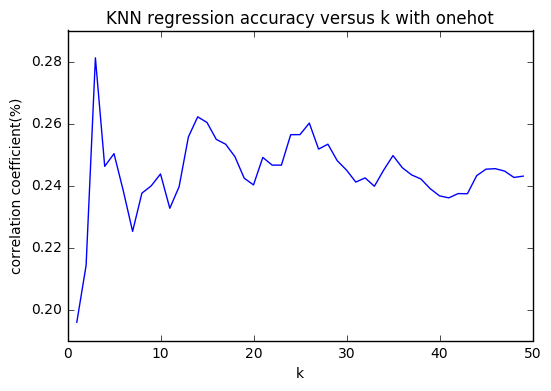

In [364]:
import matplotlib.pyplot as plt

_ = plt.plot(testRange, corrcoefs)
_ = plt.xlabel('k')
_ = plt.ylabel('correlation coefficient(%)')
_ = plt.title("KNN regression accuracy versus k with onehot")
plt.show()
plt.close()

#### 使用TF矩阵

In [367]:
def run_knn_regress2(k):
    '''使用验证集得到分类准确率，进行调参'''
    ansLabel = dict()
    for i in validateSet_label2.keys():
        ansLabel[i]=[]
    for index, wordVector in enumerate(TF_validateSet2):
        ans = knn_regress(TF_trainSet2, trainSet_label2, k, wordVector)
        ######### nan 值的debug代码#########################
#         flag = False
#         for i in validateSet_label2.keys():
#             if  np.isnan(ans[i]):
#                 print('nan value found in %d' % (index))
#                 print('terminate..')
#                 flag = True
#         if flag: break
        ########## nan 值的debug代码#########################
        for i in ans.keys():
            ansLabel[i].append(ans[i])
    
    #print('k =%2d：' % k)
    tot = 0
    for i in ansLabel.keys():
        corr = np.corrcoef(ansLabel[i],validateSet_label2[i])[0,1]
        tot += corr
        #print('%s:%.5f' % (i, corr), end=' ')
    averageCorrcoef = tot/len(ansLabel.keys())
    #print('\naverage:%.5f' % (averageCorrcoef))
    return averageCorrcoef
    
corrcoefs = []
testRange = list(range(1,15))
for k in testRange:
    corrcoefs.append(run_knn_regress2(k))

In [369]:
bestK_TF = testRange[np.argmax(corrcoefs)]
bestK_TF

6

可以看到，当k=6时平均相关系数最高，达到了28.928%。下面来绘制相关系数随着K值变化的曲线图。

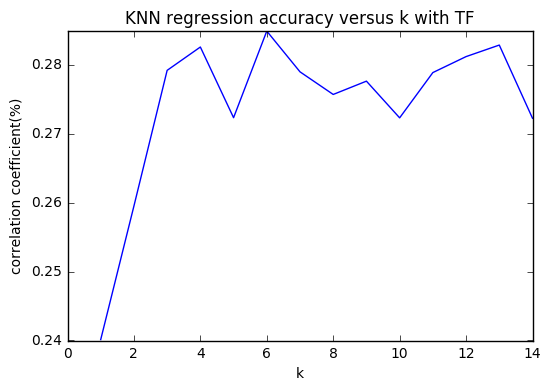

In [368]:
import matplotlib.pyplot as plt

_ = plt.plot(testRange, corrcoefs)
_ = plt.xlabel('k')
_ = plt.ylabel('correlation coefficient(%)')
_ = plt.title("KNN regression accuracy versus k with TF")
plt.show()
plt.close()

### 对测试集进行分类

下面使用最优的k值来对测试集进行分类。

#### 使用onehot矩阵

In [344]:
ansLabel = dict()
for i in validateSet_label2.keys():
    ansLabel[i]=[]
for index, wordVector in enumerate(oneHot_testSet2):
    ans = knn_regress(oneHot_trainSet2_, trainSet_label2, bestK_onehot,wordVector)
    for i in ans.keys():
        ansLabel[i].append(ans[i])

In [346]:
outputFileName = "15352220_linzecheng_KNN_regression_onehot.csv"

columns_ = ['textid', 'anger', 'disgust', 'fear', 'joy', 'sad', 'surprise']

res = pd.DataFrame({
    'textid' : list(np.arange(1, len(testSet2)+1)),
    'anger' :ansLabel['anger'],
    'disgust':ansLabel['disgust'],
    'fear':ansLabel['fear'],
    'joy':ansLabel['joy'],
    'sad':ansLabel['sad'],
    'surprise':ansLabel['surprise']
}, columns=columns_)

res.to_csv(outputFileName, index=False)

## NB回归算法

### 实验原理

NB回归也是一条公式： 

$bestClass=argmax_{class} P(class|data)=argmax_{class}P(data|class)*P(class) $

$=argmax_{class}\sum_{i=1}^nP(data|d_i,class)*P(d_i, class)$

其中，

$P(data|d_i,class)=\prod_{j=1}^{document-number}P(word_j|d_i, class)$


很明显，这里的连乘就是假设属性间条件独立所得出来的。

而$P(word_j|d_i, class)$的求解同样可用拉普拉斯平滑来得出：

```
P(word_j|class) = (word_j在d_i出现的次数+lambda)/
                  (d_i中所有词的次数和+lambda*所有文档中不重复词的词数)
[注：d_i中所有词的次数包含重复的词]
```

### 得到三个数据集的类TF矩阵

由于根据上面的公式求出来的矩阵有点像TF矩阵（事实上当lambda==0时就是TF矩阵），所以这里暂前将要命令的矩阵叫为类TF矩阵。

In [237]:
import numpy as np
from collections import Counter

def getSimilarTF(trainSet_, allWordsNum_train, allWords_train_other, lambda_):
    '''得到输入训练集的类TF矩阵、所有可能的标签'''
    def calcProbs(numerator, denominator):
        '''根据输入的分子和分母计算先验概率值'''
        return (numerator+lambda_) / (denominator+lambda_*allWordsNum_train)
    #预分配内存
    similarTF = np.zeros((len(trainSet_), len(allWords_train_other)))
    #遍历整个数据集
    for rowIdx, doc in enumerate(trainSet_):
        #得到所有词的词频统计
        wordCounter = Counter(doc)
        #遍历每个词
        for colIdx, word in enumerate(allWords_train_other):
            #得到矩阵每个元素的概率值
            similarTF[rowIdx, colIdx] = calcProbs(wordCounter.get(word,0), len(doc))
    
    return similarTF

####################测试程序#################
a = [['a','b'], ['b','c']]              #trainSet_
b = len(set([j for i in a for j in i])) #allWordsNum_train
c = [['e','a'], ['c','f']]              #otherSet
                                        #allWords_train_other
d = list(set([j for i in a for j in i]).union([j for i in c for j in i]))
e = {'good':[0.8, 0.2],'bad':[0.2, 0.8]}#trainSet_label
a, b, c
d, e
getSimilarTF(a, b, d, lambda_=0)        #lambda 为 0时
getSimilarTF(a, b, d, lambda_=1)        #lambda 为 1时
####################测试程序#################

([['a', 'b'], ['b', 'c']], 3, [['e', 'a'], ['c', 'f']])

(['e', 'b', 'f', 'c', 'a'], {'bad': [0.2, 0.8], 'good': [0.8, 0.2]})

array([[ 0. ,  0.5,  0. ,  0. ,  0.5],
       [ 0. ,  0.5,  0. ,  0.5,  0. ]])

array([[ 0.2,  0.4,  0.2,  0.2,  0.4],
       [ 0.2,  0.4,  0.2,  0.4,  0.2]])

下面来根据上面例子的输出来说明该函数的实现正确性。

当 $\lambda=0$ 时， 所求的即是TF矩阵，因此输出结果应为：

```
           'e'  'b'  'f'  'c'  'a'             'e'  'b'  'f'  'c'  'a'
第一行数据  0/2  1/2  0/2  0/2  1/2  ---化简-->  0   0.5   0    0    1
第二行数据  0/2  1/2  0/2  1/2  0/2              0   0.5   0   0.5   0
```
和结果相符。

当 $\lambda=1$ 时， 所求的即是使用拉普拉斯平滑的类TF矩阵，因此输出结果应为：

```
               'e'           'b'          'f'          'c'        'a'         
第一行数据  (0+1)/(2+3)  (1+1)/(2+3)  (0+1)/(2+3)  (0+1)/(2+3)  (1+1)/(2+3)
第二行数据  (0+1)/(2+3)  (1+1)/(2+3)  (0+1)/(2+3)  (1+1)/(2+3)  (0+1)/(2+3)    

---化简-->

               'e'           'b'          'f'          'c'        'a'         
第一行数据      0.2           0.4          0.2          0.2        0.4
第二行数据      0.2           0.4          0.2          0.4        0.2 
```

和结果相符。因此该函数的实现是正确的。

### 回归函数实现及简单测试

伪代码：

```
NB_regress(trainSet_, trainSet_label_, allWordsNum_train, allWords_train_other,
               otherSet, lambda_):

输入数据：
------------
trainSet_ - 训练集
trainSet_label_ - 训练集标签
allWordsNum_train - 训练集中所有不重复词的个数
allWords_train_other - 训练集和验证集（或测试集）中的所有不重复词的列表
otherSet - 验证集（或测试集）
lambda_ - lambda
------------

输出数据：
------------
输入数据集的每行数据对应所有标签的可能概率值
------------

实现思路：
------------
1.得到类TF矩阵
2.对于输入数据集的每一行数据：
2.1.得到当前的一行数据中词在所有词向量的下标
2.2.得到 P(data|d_i, class)的列向量
2.3.得到基于每个类的概率值
2.4.对于所有可能的标签
2.4.1.将训练集对应标签的向量和上一步的概率向量相乘，再将结果相加，保存
2.5.将上一步得到的概率值进行归一化
3.返回分类结果
------------
```

In [319]:
import numpy as np
from functools import reduce

def NB_regress(trainSet_, trainSet_label_, allWordsNum_train, allWords_train_other,
               otherSet, lambda_):
    '''使用NB进行回归，返回每个数据对应的类标签概率'''
    #得到类TF矩阵
    similarTF = getSimilarTF(trainSet_, allWordsNum_train, allWords_train_other,
                            lambda_)
    #要输出的label
    outputLabel = dict() 
    #得到所有可能的标签
    allLabels = list(trainSet_label_.keys())
    #预分配内存
    for label in allLabels:
        outputLabel[label] = np.zeros(len(otherSet))
    
    similarTF = np.array(similarTF)
    allWords_ = np.array(allWords_train_other)
    for index, data in enumerate(otherSet):
        #得到当前的一行数据中词在所有词向量allWords_的下标
        matchIndex = np.array([np.argwhere(allWords_ == word)[0][0] 
                                                    for word in data])
        #得到 P(data|d_i, class)的列向量
        probs = similarTF[:, matchIndex].prod(axis=1)
        #得到基于每个类的概率值
        temp = np.zeros(len(allLabels))
        for i, label in enumerate(allLabels):
            #对应元素相乘再相加
            temp[i] = (probs * np.array(trainSet_label_[label])).sum()
        
        #进行归一化
        for i, label in enumerate(allLabels):
            if temp.sum() != 0:
                outputLabel[label][index] = temp[i] / temp.sum()
    
    return outputLabel

####################测试程序#################
a = [['a','b'], ['b','c']]              #trainSet_
b = len(set([j for i in a for j in i])) #allWordsNum_train
c = [['e','a'], ['c','f']]              #otherSet
                                        #allWords_train_other
d = list(set([j for i in a for j in i]).union([j for i in c for j in i]))
e = {'good':[0.8, 0.2],'bad':[0.2, 0.8]}#trainSet_label
a, b, c
d, e
NB_regress(a, e, b, d, c, lambda_ = 0)  #lambda 为 0时
NB_regress(a, e, b, d, c, lambda_ = 1)  #lambda 为 1时
####################测试程序#################

([['a', 'b'], ['b', 'c']], 3, [['e', 'a'], ['c', 'f']])

(['e', 'b', 'f', 'c', 'a'], {'bad': [0.2, 0.8], 'good': [0.8, 0.2]})

{'bad': array([ 0.,  0.]), 'good': array([ 0.,  0.])}

{'bad': array([ 0.4,  0.6]), 'good': array([ 0.6,  0.4])}

下面来根据上面的输出来说明该函数的实现正确性。

首先，根据该数据集得到的类TF矩阵和对应的标签为为：

```
               'e'    'b'   'f'   'c'   'a'   | 'bad' 'good'     
第一行数据 d1   0.2    0.4   0.2   0.2   0.4   |  0.2   0.8
第二行数据 d2   0.2    0.4   0.2   0.4   0.2   |  0.8   0.2
```

则：

```
P('good'|['e', 'a']) = P('e'|d1,'good')*P('a'|d1,'good')*P(d1,'good') +
                       P('e'|d2,'good')*P('a'|d2,'good')*P(d2,'good')
                     = 0.2*0.4*0.8 + 0.2*0.2*0.2 = 0.072
                     
P('bad'|['e', 'a'])  = P('e'|d1,'bad')*P('a'|d1,'bad')*P(d1,'bad') +
                       P('e'|d2,'bad')*P('a'|d2,'bad')*P(d2,'bad')
                     = 0.2*0.4*0.2 + 0.2*0.2*0.8 = 0.048   
                     
P('good'|['c', 'f']) = P('c'|d1,'good')*P('f'|d1,'good')*P(d1,'good') +
                       P('c'|d2,'good')*P('f'|d2,'good')*P(d2,'good')
                     = 0.2*0.2*0.8 + 0.4*0.2*0.2 = 0.048   
                     
P('bad'|['c', 'f'])  = P('c'|d1,'bad')*P('f'|d1,'bad')*P(d1,'bad') +
                       P('c'|d2,'bad')*P('f'|d2,'bad')*P(d2,'bad')
                     = 0.2*0.2*0.2 + 0.4*0.2*0.8 = 0.072                       
```

归一化之后，有：

```
P('good'|['e', 'a']) = 0.72/(0.72+0.48) = 0.6
P('bad'|['e', 'a'])  = 0.48/(0.72+0.48) = 0.4
P('good'|['c', 'f']) = 0.48/(0.72+0.48) = 0.4
P('bad'|['c', 'f'])  = 0.72/(0.72+0.48) = 0.6
```

与输出的结果：

```
{'bad': array([ 0.4,  0.6]), 'good': array([ 0.6,  0.4])}
```

一致，因此该函数的实现正确。

### 使用验证集调参

和NB分类一样，这里需要调参的地方也是：平滑系数 $\lambda$ 的选择。

In [323]:
def run_NB_regress(lambda_):
    '''使用验证集得到回归准确率，进行调参''' 
    #调用 NB 回归函数
    predictLabel = NB_regress(trainSet2, trainSet_label2, len(allWords_trainSet2),
                               allWords_train_validate2, validateSet2, lambda_)
    #计算每一个label的相关系数
    temp = []
    for label, val in validateSet_label2.items():
        checkPair = (predictLabel[label], validateSet_label2[label])
        temp.append(np.corrcoef(checkPair)[0][1])
    #得到平均的相关系数
    averageCorrcoef = np.average(temp)
    #print('lambda: %.5f --> corrcoeff: %.5f%%' % (lambda_, averageCorrcoef*100))
    return averageCorrcoef
    
bestResult = (0, 0)
testRange =  np.arange(0,3.1,0.01)
corrcoefs = np.zeros(len(testRange))

for index, lambda_ in enumerate(testRange):
    corrcoef_ = run_NB_regress(lambda_) * 100
    corrcoefs[index] = corrcoef_
    bestResult = max(bestResult, (corrcoef_, lambda_))

print('max correlation coefficient is %.5f%% when lambda is %.5f' % (bestResult))

max correlation coefficient is 35.92402% when lambda is 0.03000


可见，在 $\lambda$ 为0.03时，分类率最高，为35.92402%。 下面来绘制随着 $\lambda$ 改变，NB回归相关系数的变化图：

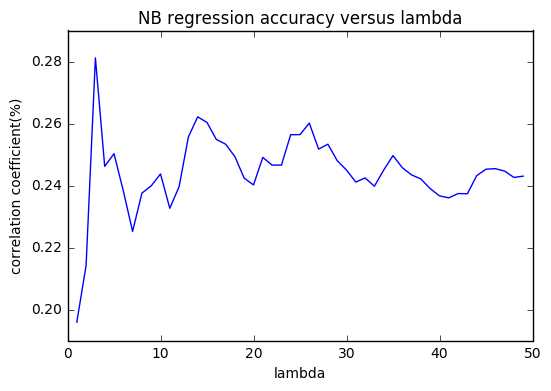

In [363]:
import matplotlib.pyplot as plt

_ = plt.plot(testRange, corrcoefs)
_ = plt.xlabel('lambda')
_ = plt.ylabel('correlation coefficient(%)')
_ = plt.title("NB regression accuracy versus lambda")
plt.show()
plt.close()

### 对测试集进行分类

下面使用最优的lambda来对测试集进行分类。

In [326]:
outputFileName = "15352220_linzecheng_NB_regression.csv"

#调用 NB 回归函数
predictLabel = NB_regress(trainSet2, trainSet_label2, len(allWords_trainSet2),
                           allWords_train_test2, testSet2, lambda_ = bestResult[1])

columns_ = ['textid', 'anger', 'disgust', 'fear', 'joy', 'sad', 'surprise']

res = pd.DataFrame({
    'textid' : list(np.arange(1, len(testSet2)+1)),
    'anger' :predictLabel['anger'],
    'disgust':predictLabel['disgust'],
    'fear':predictLabel['fear'],
    'joy':predictLabel['joy'],
    'sad':predictLabel['sad'],
    'surprise':predictLabel['surprise']
}, columns=columns_)

res.to_csv(outputFileName, index=False)

# 思考题

- 1.KNN回归的公式为什么要以距离的倒数作为权重。

    - 答：直观上也可以解释，距离越大，那么说明两个样本之间的相似度就越小，从这里就可以看出一个反比的关系了，因此可以用距离的倒数作为权重。
    
- 2.同一测试样本的各个情感概率总和应该为1，这如何处理？

    - 答：将所有情感概率都除以所有情感概率的和即可。


- 3.在矩阵稀疏程度不同的时候，曼哈顿距离和欧式距离表现有什么区别，为什么？

    - 答：曼哈顿距离和欧式距离从定义上的区别就是一个是1范数，一个是2范数，而当矩阵稀疏程度低时，欧式距离由于需要对两个向量对应元素相减的差进行平方操作，运算量会比较大，而曼哈顿距离则只需要进行两个向量对应元素相减的操作即可，运算量相对减少很多。但是正所谓鱼与熊掌不可兼得，从实际的应用来看，欧式距离可以理解为两个向量直接的最短距离，而从空间中一个点到另外一个点的最短距离时唯一的；而曼哈顿距离则没有欧式距离的“严谨性”，从空间中一个点到另外一个点的距离相等的路径有许多条，这样的“多样性”使得曼哈顿距离在实际的应用效果会比欧式距离相对要差。
    
    
    
- 4.NB中伯努利模型和多项式模型各有什么优缺点？

    - 答：**伯努利模型**的优点是模型比较简单，较方便实现，内存开销比较小；缺点是不能反映词数对分类的影响，有时可能会出现欠拟合的情况。
    **多项式模型**的优点：有考虑词数对分类的影响，比伯努利模型的适用性更强；缺点是模型比较复杂，实现难度比伯努利模型要高，由于需要考虑词数的影响后需要的内存开销比较大；
    

- 5.如果测试集中出现了一个之前全词典中没有出现过的词该如何解决？

    - 答：矩阵新加一列代表该词的列。
    
    
# 附录

## 参考资料

1.[stackoverflow : how-to-get-indices-of-n-maximum-values-in-a-numpy-array][1]

2.[stackoverflow : show-dataframe-as-table-in-ipython-notebook][2]

3.[Machine Learning-Normalization][3]

4.[为什么一些机器学习模型需要对数据进行归一化？][4]

5.[stackexchange : Standardizing some features in K-Means][5]

[1]:https://stackoverflow.com/questions/6910641/how-to-get-indices-of-n-maximum-values-in-a-numpy-array
[2]:https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook
[3]:http://www.csuldw.com/2015/11/15/2015-11-15%20normalization/?utm_source=tuicool&utm_medium=referral
[4]:http://www.cnblogs.com/LBSer/p/4440590.html
[5]:https://stats.stackexchange.com/questions/223289/standardizing-some-features-in-k-means/223355#223355


## 相关函数测试

 **-------------------------------------------平台配置代码--------------------------------------------**

In [5]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"

# from IPython.display import Image
# 其对应的三元顺序表为=Image("./images/1.jpg")
# 稀疏矩阵例子为=Image("./images/2.jpg")